## The Twitter API and Journalists 
<hr>
Journalists use Twitter for a myriad of reasons: follow breaking news events, get in touch with sources, verify stories, interact with their audience. For the most part, these things can all be done using your Twitter client: taking some time to set up [Tweetdeck](https://tweetdeck.twitter.com/)  for your beat goes a long way, as does creating [Twitter lists](https://help.twitter.com/en/using-twitter/twitter-lists) based on your beat or your interests.

### So, then, when and why would you use the Twitter API?
<br>
The Twitter API comes in useful for other kinds of reporting and analysis, including:

* social network analysis (including identifying bot networks)
* identifying long-term trends
* hashtag and website co-occurences
* the user accounts creating movements (which users are continuously/incessantly tweeting about a certain keyword or hashtag?)
* ... 

<br>

It is, however, worth noting that while Twitter can give you a sample of the real world, it doesn't necessarily reflect the real world. According to recent numbers, only [55 percent of the global population is online](https://internetworldstats.com/stats.htm), and [less than 25 percent of that  population is on Twitter](https://www.omnicoreagency.com/twitter-statistics/). Hence, while it is tempting to use Twitter—a data source that is easily accessible—it is worth remembering that in doing so, you're missing many voices and perspectives. Any work done using Twitter should take that into account.  
<br><br>
Also, be careful. You don't want this to be you:
<br><br>
  
![](https://imgs.xkcd.com/comics/twitter_bot.png)
<br><hr>

### What all can I get from the Twitter API?
<br>
The Twitter API has multiple use cases, which you can see [here](https://developer.twitter.com/#). For the purposes of this project, we will be focusing solely on the [Analyze](https://developer.twitter.com/en/use-cases/analyze) APIs, which allow us to:

* Explore trends
* Search for specific terms and user accounts
* Filter for specific terms and user accounts
<br><br>

All of these APIs are free to access, albeit with some limitations. The ones that you're likely to run into are:

* Rate limits, i.e. accessing the Twitter API too many times in too little time. You can find the rate limits for different API endpoints [here](https://developer.twitter.com/en/docs/basics/rate-limits.html) 
* Time, i.e. you can only get tweets for the last seven days

<br><hr>

### Setting up your Twitter Developer account

Before we get going, you'll have to set up your Twitter developer account, and extract the access tokens. To do this:

1. Create a developer account [here](https://developer.twitter.com/en/apps/)
2. Click on the "Create an app" button and fill out the details. 
3. Once the app is created, click on the "Details" view and then go to "Keys and tokens" 
4. Click on "Generate" to get your access token and access token secret 

<br><hr>

### Right, let's write some code. 

But, before we get into it, some notes:
* All the code here is working with Python 3.6. You can get started by installing Jupyter Notebook from [here](https://jupyter.org/install). A good resource for understanding how Jupyter Notebook works can be found [here](https://hub.packtpub.com/basics-jupyter-notebook-python/). 
* We will be using multiple third-party Python libraries that will make our lives easier. This includes:
  * [tweepy](http://www.tweepy.org) is "an easy-to-use Python library for accessing the Twitter API.
  
Libraries can be installed using the `pip install` command. This is NOT a Python command, but instead a [shell command](https://en.wikipedia.org/wiki/Bash_%28Unix_shell%29), i.e. it runs at the system level. This means you will not have to re-install the libraries every single time you want to use the same library in a different Python script. 

You can install Python libraries within Jupyter Notebook itself; you just have to include an '!' before the command. The '!' tells the cell that this piece of code isn't Python code, but instead something that's run at the shell level. 

If a line begins with '#' it means that the line is a comment. Comments are used by developers to explain what they are trying to do, or to provide more context for that part of the code. Not only is this great when you work in a team, but also, you really are doing a favour to your future self, because when you go back to the code months later, you will inevitably forget why you added a piece of logic. 
<br>
![](https://imgs.xkcd.com/comics/future_self.png)
<br><hr>

In [ ]:
# We start by installing all the libraries we need. 
# As described above, to do this, we use the `pip` command. 
!pip install tweepy

### Initialise connection to the Twitter API
<hr>

In [1]:
# Once we've installed the libraries we need, we need to import them into our workspace. 
# Other than third-party libraries and functions, sometimes we will also need to import 
# some Python built-in modules and functions. 

import tweepy 

# Remember the keys and tokens you generated when you created your app—let's use those now.
# Here, we are creating variables and _initialising_ them. The variable _name_ is on the left-hand 
# side of the "=" sign, and the value we initialise it to is on the right-hand side. 
# NOTE: THESE API KEYS ARE DUMMY KEYS
CONSUMER_API_KEY = "fjkaljldfjjalkjlkfdjalfjdsalkjfkls"
CONSUMER_API_SECRET_KEY = "fkjewrueoiwaru3294lkwdje23048jlq;e"
ACCESS_TOKEN = "478934890908-sfwjklakljeaw"
ACCESS_TOKEN_SECRET = "kglkfew90sdkml-80-dmlajlk0279"

### Inside baseball - 1

Above, we assign the four access keys and tokens generated to _variables_. There are few constraints when it comes to setting variables, but we typically use sensible naming conventions so that the code is more readable. For example, you wouldn't refer to `CONSUMER_API_KEY` as `fdajlks` because it would be a pain to remember that further down in your code. 

Typically, you wouldn't capitalise the variables. Capitalisation is a **code convention** that indicates that the variable is a _constant_, i.e. no other value should ever be assigned to this variable. 

Python will not stop you from assigning a new value to this variable, but if you do so, the value for that variable will be _overridden_. So, for example, if you run this piece of code: 

`CONSUMER_API_KEY = "fdajlks"`

Then `CONSUMER_API_KEY` will alter its value. The only means to return to the original value is to set the value again, i.e. `CONSUMER_API_KEY = "DyamVx4NADhgGm1CtOW00Sl8H"`. 

Implicitly, this also means that you cannot have two variables with the same name, because there is no mechanism to tell Python that you are creating a new variable as opposed to changing the value on an existing variable. (Note: there are other programming languages that let you do this.)  

It is worth noting that when you run a cell, the code doesn't run _in one go_, but _in sequence_. 

In [2]:
# Once we've initialised the variables that hold the values for our Twitter access keys and 
# (cell 8 above), we can authenticate with Twitter, and initialise our connection to 
# the Twitter API.

auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET_KEY)
auth.secure = True
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

# The Twitter API has a rate limit, i.e. it will only allow you to call the API 'x' times a minute. 
# By setting this property to true, we tell the API to wait until the rate limit replenishes, and 
# then carry on collecting the data we are interested in. 
api.wait_on_rate_limit = True 

In [ ]:
# To check if the connection is successful, you can run a single line of code. 

api.me()

# If you are connected successfullly, this should show you user account details. 
# 
# On the other hand, if you're not, you should see something like:
# Traceback (most recent call last):
#   File "<stdin>", line 1, in <module>
#   File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tweepy/api.py", line 338, in me
#     return self.get_user(screen_name=self.auth.get_username())
#   File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tweepy/auth.py", line 134, in get_username
#     user = api.verify_credentials()
#   File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tweepy/api.py", line 631, in verify_credentials
#     )(**kargs)
#   File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tweepy/binder.py", line 245, in _call
#     return method.execute()
#   File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tweepy/binder.py", line 229, in execute
#     raise TweepError(error_msg, resp, api_code=api_error_code)
# tweepy.error.TweepError: [{'code': 32, 'message': 'Could not authenticate you.'}]

### Inside baseball - 2

Let's talk a little about syntax. If you don't really care, and you just want to get to the good stuff, that's fine too. Skip on ahead. 

In the above lines of code (cell 14, mostly), we initialise our connection to the Twitter API. There are multiple syntactical things of note here:
* `CONSUMER_API_KEY` and `CONSUMER_API_SECRET_KEY` are _constructor arguments_ to a **class** created by `tweepy` called `OAuthHandler`. You can read more about classes [here](https://docs.python.org/2/tutorial/classes.html). 
* The two _arguments_ refer to the variables initialised in cell 8. **If you had, instead, used `"CONSUMER_API_KEY"` and `"CONSUMER_API_SECRET_KEY"` (notice the quotes), the API connection would fail.** This is because you would then be passing in the [strings](https://en.wikipedia.org/wiki/String_(computer_science)) `"CONSUMER_API_KEY"` and `"CONSUMER_API_SECRET_KEY"` as opposed to the variables you initialised earlier. 
* Classes _expose_ functions. In this case, the `OAuthHandler` exposes a function called `set_access_token()` that takes in two _parameters_: the `ACCESS_TOKEN` and `ACCESS_TOKEN_SECRET`. When that function is called, behind the scenes, `tweepy` does some magic, which means that when you call `tweepy.API(auth)`, all the credentials required for successful authentication are sent to Twitter to verify. 

### Search the Twitter API for a keyword or a hashtag or an account
<hr>

At different times—for different purposes—you'll want to access different endpoints. Sometimes, you just want to see what a set of accounts are tweeting about—say all the Congressional candidates in the lead-up to the U.S. Midterm election, world leaders, or journalists from your favourite news organisation (!). At other times, you might want to tap into a hashtag or phrase, depending on what's trending or what you're trying to research. 

The good news is that you can use the `tweepy` library to do all of the above.

For the purpose of this exercise, we'll search Twitter for `#climatechange` or `climate change`.

In [ ]:
# First, we construct the search query. The easiest way to construct the query is by
# going here: https://twitter.com/search-advanced
# ...and setting the values you want. Once you do that and click on search, you can get the 
# query string from the results page. This is what you assign to the `query` variable below. 
query = '#climatechange OR "climate change" since:2018-11-23 until:2018-11-28'

# We'll get into the syntax in a minute, but for now, have a look at the output.
for tweet in tweepy.Cursor(api.search,
                           q=query,
                           lang="en").items():
    print(tweet)
    break


## Exploring what Twitter sends down in a single tweet object

In [5]:
# Most of the attributes we care about will be within the JSON datastructure, so let's pull 
# that out first. 

# this stores all the attributes sent down in a dictionary, where the key is the 
# attribute name. 
formatted_tweet = tweet._json 
keys = list(formatted_tweet.keys())
print(f"The attributes that Twitter sends down are {keys}")

The attributes that Twitter sends down are ['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang']


Dictionaries store key-value pairs. In the case above (`formatted_tweet`), the key is always a string. The values, however, can be anything: 
* string (which is the case for `text`, `lang`, etc.), 
* boolean, i.e. True or False (which is the case for `retweeted`, `is_quote_status`, etc.
* dictionaries as well (yes, you can have nested dictionaries). 

The data structure that Twitter sends back has a dictionary for a few of the keys we would typically be interested in. This includes:
* user, which has details about the user account including if it's verified or not, when it was created, how many followers it has, etc. 
* entities, which has details about the tweet including which links were included in it, the hashtags it contained etc. 

We can see the attributes in the nested dictionaries by running the below code. 

In [6]:
entities_keys = list(formatted_tweet["entities"].keys())
print(f"The entities sent down by Twitter are {entities_keys}")
print("\n ----- \n")
user_attributes = list(formatted_tweet["user"].keys())
print(f"The user attributes sent down by Twitter are {user_attributes}")

The entities sent down by Twitter are ['hashtags', 'symbols', 'user_mentions', 'urls']

 ----- 

The user attributes sent down by Twitter are ['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type']


There are two ways to access dictionaries, and their content. Typically, we use the shorthand with the square brackets:

`tweet_text = formatted_tweet["text"]`

This will pull out the value that the `formatted_tweet` dictionary has for the key "text" and _asssign_ it to the variable `tweet_text`. 

The problem here is that if the key "text" doesn't exist in the dictionary `formatted_tweet`, Python will _throw_ an error, i.e. things will go boom! And, so, you add some _defensive coding_ to handle scenarios where things don't go exactly according to plan. In this case, we can do something as simple as 

`tweet_text = formatted_tweet.get("text", "")`

This will simply try to get the "text" attribute from `formatted_tweet`, but if the key doesn't exist, then it will default to an empty string (""). 

### Inside baseball - 3 
The code uses a `cursor`, which, the `tweepy` documentation explains at length [here](https://tweepy.readthedocs.io/en/v3.4.0/cursor_tutorial.html). In layman's terms, Cursors enable _pagination_.
<br>
<br><hr>
#### What is pagination? 

Pagination is a way in which we get data in chunks instead of all the data in one go. Think about it like this: if you're getting data for 400,000 tweets in one go, it'll be a very large _payload_, and that can clog up the infrastructure or ensure that your system runs out memory. You don't want that. Hence, you ask for data in chunks, i.e. 100 tweets at a time (this, by the way, is the maximum number of tweets you can get in one go via the Twitter API pagination). 
<br><br>
<hr>
<br>
In the chunk of code `tweepy.Cursor(api.search, q=query, lang='en')`, we are asking `tweepy` to call the Twitter "search" API (hence the first parameter), with the query we defined, and only give us tweets that are in English (lang="en"). 

The `for` construct (`for tweet in...`) is called a _loop_. What it effectively says is, as long as there are items that we haven't processed yet, keep processing the items. (In the above case, processing is simply printing the tweet `print(tweet)`. 

Here, `tweet` is a variable that is implicitly assigned the value of whatever tweet is being processed right now. You can as easily call it "snickerdoodle": `for snickerdoodle in...`. Then, if you `print(snickerdoodle)`, the result will be the same. 

The `break` tells Python to step out of the for loop, or to stop processing items. We are using it here because we only want to see the output from one tweet. We will re-write some of this code later without the `break`, which will enable us to keep _processing_ tweets until there are no more results from Twitter. 

<br>
The output above shows us the data Twitter sends us back for a single tweet. This data is in a format called [`JSON`](https://en.wikipedia.org/wiki/JSON). When formatted _correctly_, tweets look like [this](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html).
<hr>

For the purpose of this exercise, we'll only extract a handful of attributes that we care about:
* id (the unique identifier for the tweet)
* created_at (which is the time the tweet was created)
* screen_name (the username of the tweet)
* text (the actual text of the tweet)
* favorite_count (the number of likes the tweet received)
* retweet_count (the numner of times the tweet was retweeted)
* urls (the links that were part of the tweet)
* hashtags (all the hashtags that were part of the tweet)
* verified (is the account verified or not) 
* user created_at (when was the user's account created)
* user followers_count (how many accounts follow the user)
   
<hr>

##### Note about the Twitter API 1
**Tweets do have geolocation tags, which can be interesting. However, remember, it is easy to spoof geolocation in Twitter, and therefore, this is considered generally unreliable. Further, only a handful of tweets (under ten percent) have geolocation tags.**
<hr>

##### Note about the Twitter API 2
One super-important note from the [Twitter documentation](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html):
**Please note that Twitter’s search service and, by extension, the Search API is not meant to be an exhaustive source of Tweets. Not all Tweets will be indexed or made available via the search interface.**
<hr>

In [ ]:
import csv
import json

# Actually pull stuff from the Twitter API and process it. 
# The '-filter:...' means exclude retweets. If, however, it is a quote tweet, 
# it will be included in the search. 
query = '#climatechange OR "climate change" since:2018-11-23 until:2018-11-28 -filter:retweets'

# We will store all the tweets in a file so we can continue working with this data without 
# having to call the Twitter API every single time we want to do something. 

with open("tweets.csv", mode="w") as f:
    # The column headers for the CSV file we will create to store the attributes
    # of the tweet we are interested in. 
    fieldnames = ["id", "created_at", "favorite_count", "retweet_count", "entities_urls", 
                 "entities_hashtags", "user_verified", "user_created_at", "user_screen_name", 
                 "user_id", "user_followers_count", "text"]
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    for page in tweepy.Cursor(api.search,
                               q=query,
                               lang="en",
                               count=200).pages(100000):

        for tweet in page:
            # Extracts the JSON object for the tweet. We can just do this once here, and then
            # use `tweet_json` everywhere further down, instead of using `tweet._json`. 
            tweet_json = tweet._json  
                
            # Extract the attributes we want from each tweet, and store them in a dictionary. 
            # `condensed_tweet` is a variable which is initialised to an empty dictionary ({}). 
            # Each tweet initialises a new dictionary; the attributes that we are interested in
            # become the keys whereas the values come from the tweet itself.
            condensed_tweet = {}
            condensed_tweet["id"] = tweet_json["id"]
            condensed_tweet["created_at"] = tweet_json["created_at"]
            condensed_tweet["favorite_count"] = tweet_json["favorite_count"]
            condensed_tweet["retweet_count"] = tweet_json["retweet_count"]
            condensed_tweet["entities_urls"] = tweet_json.get("entities", {}).get("urls", [])
            condensed_tweet["entities_hashtags"] = tweet_json.get("entities", {}).get("hashtags", [])

            # if the user object has no key for `verified`, default to False. 
            condensed_tweet["user_verified"] = tweet_json["user"].get("verified", False)
            condensed_tweet["user_created_at"] = tweet_json["user"].get("created_at", False)
            # Remember: Users can change their screen name on Twitter. Hence, along with extracting
            # the username (which is the screen name), we should extract the user's id as well, which
            # will always be constant for the user even when the username/screen name is changed.
            condensed_tweet["user_screen_name"] = tweet_json["user"].get("screen_name", "")
            condensed_tweet["user_id"] = tweet_json["user"].get("id", "")
            condensed_tweet["user_followers_count"] = tweet_json["user"].get("followers_count", 0)

            # This logic is a result of a quirk in the Twitter API. 
            # If a tweet is very long, for some reason, Twitter puts it in `retweeted_status`.
            # Because we don't want to lose text, we first check if the text is in `retweeted_status`. 
            # If it is, we get the text from there. Else, we use the `text` attribute. 
            if "retweeted_status" in tweet_json and "text" in tweet_json["retweeted_status"]:
                condensed_tweet["text"] = tweet_json["retweeted_status"]["text"]
            else:
                condensed_tweet["text"] = tweet_json["text"]

            # Once we've created the _condensed_tweet_, we append it to the file. 
            # "Append" means that each tweet is added to the end of the file, `tweets.csv`. 
            writer.writerow(condensed_tweet)

### Inside baseball - 4 \[Data Structures\] 

##### Dictionaries 
A dictionary is a collection of key-value pairs; you can read more about them [here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). An example dictionary is:
```
hogwarts_house_mapping = {
    "Harry Potter": "Gryffindor", 
    "Cedric Diggory": "Hufflepuff", 
    "Draco Malfoy": "Slytherin", 
    "Luna Lovegood": "Ravenclaw"
}
```
You typically use dictionaries when there is a unique _key_ (the value left of the ":"). In the example above, each Hogwarts student can only belong to one house. Hence, the dictionary is a good data structure to use. 

To lookup the value in a dictionary, i.e. to see which house a student belongs to, you would make this call:

```
harry_house = hogwarts_house_mapping["Harry Potter"]
```

This would return `Gryffindor`. 

However, if you tried to get Hermione's house:

```
hermione_house = hogwarts_house_mapping["Hermione Granger"]
```
...you'd get a `KeyError`, as the key doesn't exist. 

In this case, you can either _handle_ the `KeyError` or add some defensive coding:

```
hermione_house = hogwarts_house_mapping.get("Hermione Granger", "")
```

Here, if the key doesn't exist in the dictionary, you get an empty string ("") back. Sometimes, you'll want to handle the exception cleanly. Other times, the default value will suffice. 
<br><hr>

### Loading data from a file
<hr>

Once we get all the tweets, we can load it from the file and store it in a table. We use a third-party _library_ called [`pandas`](https://pandas.pydata.org), a data analysis library for Python. The main data structure here is called a `DataFrame`, which—for all practical purposes—is a table. 

Remember, if you don't have `pandas` already installed, now would be a good time to do so. 

In [ ]:
!pip install pandas

In [8]:
# Import the third-party library. The "as pd" allows us to refer to `pandas` as `pd` 
# from here on. If we didn't specify "as pd", we could use "pandas" where we are using "pd"
# below.
import pandas as pd 

# Before doing anything, we tell pandas that each column can have a maximum width of 
# 800 pixels. We do this for purely display/aesthetical purposes: further down, when
# we start tinkering with the data, we will want to see the entire text of the tweet. 
# The default maximum column width is typically too narrow for us to see the entire 
# tweet, which means we see a truncated version. 
pd.set_option('max_colwidth', 900)

# These are the same field names as above. 
fieldnames = ["id", "created_at", "favorite_count", "retweet_count", "entities_urls", 
             "entities_hashtags", "user_verified", "user_created_at", "user_screen_name", 
             "user_id", "user_followers_count", "text"]

# We specify the datatype of some of the columns where Python is unable to 
# correct discern the datatype. This can be for multiple reasons, including
# when we have a bad value (e.g. a string in a column that should be an integer.)
dtypes = {
    "id": str, 
    "retweet_count": float, 
    "favourite_count": float, 
    "user_follower_count": float, 
    "user_id": str
}

# For some reason, `pandas` doesn't allow us to specify a column as `datetime`. 
# However, when we are loading in our file, we want to ensure that two columns 
# ("created_at", and "user_created_at") are treated as "datetime" columns. 
date_columns = ["created_at", "user_created_at"]

# all_tweets is a table that will house all tweets retrieved using the Twitter API. 
# The column names are the Twitter attributes, and each row represents one tweet. 
# The "read_csv" function is a `pandas` function that makes it easy to load 
# CSV files into tables. Here we pass in five parameters, the description of which are
# adjacent to each parameter. 
all_tweets = pd.read_csv("tweets.csv", # the name of the file that has all our tweets
                         #names=fieldnames, 
                         header=0,# the row that contains the column names. 
                         error_bad_lines=False, # ignore badly formatted lines
                         dtype=dtypes, # ensure the data is loaded with correct data types
                         parse_dates=date_columns, # ensure that date columns are correctly parsed
                         )

# This will sample 10 tweets from the dataset (all_tweets) so that we can get an idea of
# the kind of data we are working with. 
all_tweets.sample(10) 

,_id,id,created_at,favorite_count,retweet_count,entities_urls,entities_hashtags,user_verified,user_created_at,user_screen_name,user_id,user_followers_count,text
35841,56846,1066476754749992961,2018-11-24 23:40:47,0.0,0.0,[],"[{'text': 'ClimateChange', 'indices': [57, 71]}]",False,2013-08-28 22:43:44,heychrispizza,1708472995,34.0,"So yeah, realizing I’m feeling “stages of grief” for the #ClimateChange news. Didn’t believe it, then got angry, so here we go… 🤢"
33096,52224,1066533338532495361,2018-11-25 03:25:37,0.0,0.0,[],[],False,2008-05-27 22:32:23,gaiapassage,14926493,814.0,"Major US report says climate change not a far-off concern, but causing ‘substantial damages’ now"
123198,88220,1067891636250845195,2018-11-28 21:23:01,0.0,1.0,"[{'url': 'https://t.co/WWTSTvB99z', 'expanded_url': 'https://buff.ly/2BDOl4c', 'display_url': 'buff.ly/2BDOl4c', 'indices': [89, 112]}]",[],False,2011-01-21 14:59:34,OceanProgress,241133253,4001.0,More evidence that climate change will have disastrous effects on the fishing industry. https://t.co/WWTSTvB99z https://t.co/U9mjAYyGzB
62955,437833,1067626296807694336,2018-11-28 03:48:39,0.0,0.0,"[{'url': 'https://t.co/bb84aVRm7r', 'expanded_url': 'https://twitter.com/i/web/status/1067626296807694336', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]",[],False,2016-05-11 16:16:20,rameshkotnana1,730431353372561408,47.0,"Did You Know?\r\n\r\nIf we want to prevent warming of 2°C by 2100, then we will have to make sure that our emissions outp… https://t.co/bb84aVRm7r"
150939,127105,1068249231960489984,2018-11-29 21:03:58,0.0,0.0,"[{'url': 'https://t.co/FfqVKpqQdI', 'expanded_url': 'https://twitter.com/i/web/status/1068249231960489984', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]",[],False,2010-07-24 14:13:23,BrianJTrautman,170318438,5108.0,"It partly is. No doubt. When listing the roots of the migrant/border crisis, it's irresponsible to highlight decade… https://t.co/FfqVKpqQdI"
146177,120524,1067582995303809025,2018-11-28 00:56:35,0.0,0.0,"[{'url': 'https://t.co/yr8rlReJl2', 'expanded_url': 'https://twitter.com/i/web/status/1067582995303809025', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]",[],False,2015-06-16 19:20:31,SharlieMello,3246950598,37.0,"This gave me the best laugh I've had all month, hell... all year! With what you've done and said within the last 2… https://t.co/yr8rlReJl2"
93734,46253,1067532749119078400,2018-11-27 21:36:55,0.0,0.0,"[{'url': 'https://t.co/OW5XhoEG6J', 'expanded_url': 'https://twitter.com/i/web/status/1067532749119078400', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]","[{'text': 'MostImportantInTheWorld', 'indices': [24, 48]}]",False,2018-10-28 21:22:36,fomtriok,1056657508574642177,10.0,"The idea with the daily #MostImportantInTheWorld tweet is simple: If a human wants achieve a personal goal, he/she… https://t.co/OW5XhoEG6J"
63242,2,1067206351858950144,2018-11-26 23:59:56,0.0,0.0,"[{'url': 'https://t.co/ZMT5bZ7Mxv', 'expanded_url': 'https://www.dailykos.com/story/2018/11/26/1815228/-The-world-s-highest-glacier-s-on-top-of-Mount-Everest-are-melting-because-of-climate-change', 'display_url': 'dailykos.com/story/2018/11/…', 'indices': [91, 114]}]",[],False,2018-03-07 22:04:51,steph_smith68,971506993256116224,199.0,The world's highest glaciers on top of Mount Everest are melting because of climate change https://t.co/ZMT5bZ7Mxv
88481,38519,1066865119194279936,2018-11-26 01:24:00,0.0,0.0,[],[],False,2010-08-03 16:26:33,stacienoonan,174306984,55.0,flip flopping mother freaks. climate change advocates are starting to grate on my nerves.
38829,61840,1066428827394629632,2018-11-24 20:30:20,0.0,0.0,"[{'url': 'https://t.co/NYqiUrXCxC', 'expanded_url': 'https://b-gat.es/2RExCn0?WT.mc_id=00_00_00_share_tw', 'display_url': 'b-gat.es/2RExCn0?WT.mc_…', 'indices': [35, 58]}]",[],False,2010-05-16 16:51:08,Rusby66,144554330,1140.0,Climate change and the 75% problem https://t.co/NYqiUrXCxC via @bill

### Inside baseball - 5 \[A Quick Note on `read_csv`] 

When you're reading a CSV file into a `pandas` table (called a `dataframe`), you pass in a bunch of parameters. One of these is to infer the header. There are two ways of doing so:
* If the CSV file has a header row (which is presumably the first row), then `header=0` will ensure your column headings are correct.* 
* If the CSV file doesn't have a header, then you can use `names=fieldnames` to assign column headings. This will depend on the `fieldnames` variable being defined (as it is above). 
<br> 

\* You might be wondering why it's `header=0` here. Python indexes from 0, not 1. So, the first row will have a `0` index, the second row will have `1`, and so on. 

You can read more about `read_csv` [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), and zero-indexing [here](http://exple.tive.org/blarg/2013/10/22/citation-needed/). (Yes, that might make your head hurt a bit.)

![](https://imgs.xkcd.com/comics/donald_knuth.png)

### Exploring the data
<hr>

Now, you can start exploring this dataset. Let's start with a few simple things:
- how many tweets do we have?
- what are the top 10 tweets by number of retweets?
- what are the top 10 tweets by likes?

You'll see just how straightforward `pandas` makes this; it's surprisingly straightforward.

#### How many tweets do we have?
If you're concerned that the number of tweets is too low, see Note-2 above: The Twitter Search API is not exhaustive, which means that all the tweets you're getting is a mere _sample_. 

In [9]:
len(all_tweets) # the `len` function simply returns the rowcount for the entire table. 

172588

#### What are the top 10 tweets by number of retweets?

In [10]:
# Before we go here, let's rearrange the columns/filter out some columns so it's easier to read. 
retweet_count_dataframe = all_tweets[["id", "user_screen_name", "user_verified", "retweet_count", "favorite_count", "text"]]

In [11]:
# Here, we specify the column we want to sort by. You'll notice it's in square brackets, i.e. 
# [], which signifies a list in Python. This can be used if you want to sort by multiple 
# columns: first sort by Column A, then Column B, etc. 
# The `[:10]` at the end tells Python the number of rows to return. 
retweet_count_dataframe.sort_values(["retweet_count"], ascending=False)[:10]

,id,user_screen_name,user_verified,retweet_count,favorite_count,text
69671,1067156975488827392,ScottLinnen,False,47070.0,165624.0,Scientists have again landed a spacecraft on a proverbial dime on a planet 40 million miles away that rotates at 24… https://t.co/YdKIrqJwjI
472,1066114888815308806,amyklobuchar,True,43412.0,62579.0,Since this was released on a day no one would notice it... as in a Friday during a holiday weekend..let’s make sure… https://t.co/P71S5PDLfZ
7033,1066067657278070785,Ocasio2018,True,37768.0,128985.0,People are going to die if we don’t start addressing climate change ASAP.\r\n\r\nIt’s not enough to think it’s “important… https://t.co/fzfg6ppv1y
169095,1067986658899877888,neiltyson,True,36085.0,108584.0,Scientists &amp; engineers launched “InSight” from Earth (a moving platform) across 300million miles to arrive where Ma… https://t.co/KKkiBT1oU9
11705,1066047070128230400,cnnbrk,True,23387.0,25921.0,A massive federal climate change report that was due next month is out today. It warns of devastating health and ec… https://t.co/nT1pqtrsW4
4,1066119107559522304,RepAdamSchiff,True,20137.0,49803.0,"Try as the Trump Administration might to bury this study on the Friday after Thanksgiving, the effects of climate c… https://t.co/GhoDU4ewrg"
133238,1067783355876429826,miskeencore,False,16306.0,65778.0,i have so much anxiety about climate change lol what is the point of planning for the future when at this rate we don't have one
81672,1067032130885222401,sirDukeDevin,False,15863.0,67489.0,"Rick Santorum skeptical of climate change research: ""A lot of these scientists are driven by the money.""\n\nAs a PhD… https://t.co/tJvtt2fc5e"
70466,1067152462493159427,SenSanders,True,15237.0,60278.0,The fact that we have a President of the United States who doesn't believe in science is an international embarrass… https://t.co/KJAtLLRHSg
158033,1068164251293024256,badxground,False,13464.0,87699.0,If we told white people they won’t be around to sing mo bamba in the car with their wives when they’re 40 because o… https://t.co/kTPzVvkxPm


#### What are the top 10 tweets by number of likes?

In [12]:
retweet_count_dataframe.sort_values(["favorite_count"], ascending=False)[:10]

,id,user_screen_name,user_verified,retweet_count,favorite_count,text
69671,1067156975488827392,ScottLinnen,False,47070.0,165624.0,Scientists have again landed a spacecraft on a proverbial dime on a planet 40 million miles away that rotates at 24… https://t.co/YdKIrqJwjI
7033,1066067657278070785,Ocasio2018,True,37768.0,128985.0,People are going to die if we don’t start addressing climate change ASAP.\r\n\r\nIt’s not enough to think it’s “important… https://t.co/fzfg6ppv1y
169095,1067986658899877888,neiltyson,True,36085.0,108584.0,Scientists &amp; engineers launched “InSight” from Earth (a moving platform) across 300million miles to arrive where Ma… https://t.co/KKkiBT1oU9
158033,1068164251293024256,badxground,False,13464.0,87699.0,If we told white people they won’t be around to sing mo bamba in the car with their wives when they’re 40 because o… https://t.co/kTPzVvkxPm
97874,1067495041902481408,cyberwitchlexi,False,12076.0,72177.0,"ben shapiro literally said ""if climate change happens, and all the low-lying areas around the coast are underwater,… https://t.co/cWbEjbwkzZ"
81672,1067032130885222401,sirDukeDevin,False,15863.0,67489.0,"Rick Santorum skeptical of climate change research: ""A lot of these scientists are driven by the money.""\n\nAs a PhD… https://t.co/tJvtt2fc5e"
133238,1067783355876429826,miskeencore,False,16306.0,65778.0,i have so much anxiety about climate change lol what is the point of planning for the future when at this rate we don't have one
472,1066114888815308806,amyklobuchar,True,43412.0,62579.0,Since this was released on a day no one would notice it... as in a Friday during a holiday weekend..let’s make sure… https://t.co/P71S5PDLfZ
70466,1067152462493159427,SenSanders,True,15237.0,60278.0,The fact that we have a President of the United States who doesn't believe in science is an international embarrass… https://t.co/KJAtLLRHSg
4,1066119107559522304,RepAdamSchiff,True,20137.0,49803.0,"Try as the Trump Administration might to bury this study on the Friday after Thanksgiving, the effects of climate c… https://t.co/GhoDU4ewrg"


#### Super-quick takeaways
- Immediately, you can see that both top ten lists have an even distribution of verified and non-verified accounts. 
- Other than `neiltyson` (the astrophysicist) and `cnnbrk` (CNN breaking news), the verified accounts all seem to be U.S. politicians. 
- Consistently, the `favourite_count` is greater than the `retweet_count`. 


### More data exploring

#### Distribution by date
A couple of tweets (look at the `text` column) above indicate that the new climate change report would be buried because it was released on Black Friday. So, let's do some simple analysis to see whether overall tweets were less Friday (and the weekend) compared to other days of the week. 

In [13]:
tweets_by_date = all_tweets.groupby(all_tweets.created_at.dt.date).size().to_frame('#').reset_index()
tweets_by_date

,created_at,#
0,2018-11-23,20150
1,2018-11-24,26091
2,2018-11-25,15436
3,2018-11-26,26455
4,2018-11-27,31302
5,2018-11-28,27924
6,2018-11-29,25229


###### Quick aside:

In the previous cell, we first assign the `groupby` call to a variable, and then we just _state_ the variable. If we didn't assign the `groupby` to a variable, i.e. if it was simply `all_tweets.groupby(all_tweets.created_at.dt.date).size()`, then you'd get the same output. However, now that we've assigned this to `tweets_by_date`, we can use it in our code further down. 

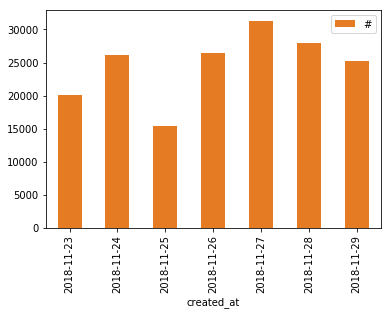

In [15]:
tweets_by_date.plot.bar(x="created_at", y="#", color=['#E57B22'])

OK, so we can now tell that most of the climate change tweets were on Tuesday, 27 November 2018. Sunday, on the other hand, had the fewest. Tuesday almost has twice the number of tweets as Sunday. Friday, all in all, isn't too bad, even though it's lagging behind the other weekdays. 

However, before we jump to any conclusions, it's worth factoring into account the time the report was released. (Also, not all the tweets are necessarily about the report)

#### So, then, next question: how do we find out what most of the tweets are about? 

There isn't one correct answer here: depending on what one's objective is, you could do multiple things. Just to get the ball rolling, let's do the simple thing: see which stories are being linked to this most. There are other approaches here too, including keyword analysis, text clustering, etc. 

For today, though, we'll focus on URL extraction. 

##### Breakdown by links
Remember, we are capturing the `urls` in the `entities` attribute from the Twitter API, so it's relatively easy to find which links were tweeted out most. 

In [16]:
#First, let's have a quick look at what this field looks like in our data. 

all_tweets['entities_urls'][:5]

0    [{'url': 'https://t.co/bJOKrNFsX1', 'expanded_url': 'https://www.abc.net.au/news/2018-11-24/climate-change-will-cost-us-billions-report-contradicts-trump/10551392', 'display_url': 'abc.net.au/news/2018-11-2…', 'indices': [78, 101]}]
1                                                                                                 [{'url': 'https://t.co/vMxPPMYiSS', 'expanded_url': 'http://ow.ly/LxBy30mJqRt', 'display_url': 'ow.ly/LxBy30mJqRt', 'indices': [106, 129]}]
2                                                           [{'url': 'https://t.co/3mGVF7BpWO', 'expanded_url': 'https://twitter.com/i/web/status/1066119128052887552', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]
3                                                                   [{'url': 'https://t.co/V4N7R0eUaY', 'expanded_url': 'https://www.bbc.com/news/world-us-canada-46325168', 'display_url': 'bbc.com/news/world-us-…', 'indices': [94, 117]}]
4                                               

Here, we see multiple _types_ of urls: Twitter URLs, URLs to news sites, and "ow.ly" links (ow.ly, like bit.ly, is a link shortening service). There is one added complication: some URLs have _cruft_ at the end of them, i.e. referral tags etc. So, we need to clean all of that up to successfully group the same links by count. 

We will use the URL associated with `expanded_url` key. 

`{'url': 'https://t.co/bJOKrNFsX1', `'expanded_url': 'https://www.abc.net.au/news/2018-11-24/climate-change-will-cost-us-billions-report-contradicts-trump/10551392' `, 'display_url': 'abc.net.au/news/2018-11-2…', 'indices': [78, 101]}
`

In [23]:
# First we import the Python module, ast, that allows us to easily change the string 
# that is currently in entities_urls to a datastructure so that we can easily extract the url.
import ast 

# Now, we add a column to the `all_tweets` dataframe with the data in a list instead of a string
all_tweets["formatted_urls"] = all_tweets.apply (lambda row: ast.literal_eval(row.entities_urls), axis=1)

In [24]:
# Next, we pull out *all* the expanded_urls that exist in formatted_urls. 
# Remember: a tweet can have more than a single url. 
all_tweets["expanded_urls"] = all_tweets.apply(lambda row: [v for d in row.formatted_urls for k,v in d.items() if k == 'expanded_url'], axis=1)

In [25]:
# Now, let's pull out all the URLs into a single list, so that we can count the ones 
# that appear most frequently. 
# We will strip out Twitter links from here, because, for the most part, these are status updates, 
# and not links to news stories. 
all_urls = [url for expanded_urls in all_tweets.expanded_urls for url in expanded_urls if "://twitter.com/" not in url]


In [26]:
# Then, count how many times each URL appears. 
from collections import Counter # a built-in Python module that makes us write less code! 
url_by_count = Counter(all_urls)
url_by_count.most_common() # get the URLs most shared. 

[('https://www.cnn.com/2018/11/23/health/climate-change-report-bn/index.html',
  1948),
 ('https://cnn.it/2Qhh8Ub', 734),
 ('https://nyti.ms/2DNbvGL', 461),
 ('http://www.bbc.co.uk/news/world-us-canada-46325168', 359),
 ('https://apple.news/AZYV2ZZ8rRH-RCBqaT65P7Q', 333),
 ('https://www.usatoday.com/story/news/nation/2018/11/23/climate-change-intensifying-economy-impacted-federal-report-finds/2093291002/',
  332),
 ('http://www.bbc.co.uk/news/science-environment-46347453', 302),
 ('https://apple.news/AJg-_eCC1Qe6i4yCPcqIgYg', 293),
 ('https://apple.news/AuzH6eAnxRrmx0QxAIgQGDQ', 288),
 ('https://www.cnn.com/2018/11/26/politics/donald-trump-climate-change/index.html',
  286),
 ('https://apple.news/AVfd3Sl7QSma5CY8WtmUX1w', 258),
 ('http://bit.ly/GCC999Climate', 256),
 ('https://www.bbc.com/news/science-environment-46347453', 246),
 ('https://www.theguardian.com/environment/2018/nov/27/world-triple-efforts-climate-change-un-global-warming?CMP=share_btn_tw',
  244),
 ('https://www.theguar

OK, this is interesting for many reasons. As a research fellow at the Tow Center, I'm intrigued by how common links from Apple News are. Four of the top twelve links is not trivial. National Geographic, The Los Angeles Times, Chicago Tribune, and CNN were the four outlets that the four stories in Apple News pointed to. It also means four of the top twelve were CNN stories. Also worth noting: three of the four CNN stories, despite the different links, point to the same story: [Climate change will shrink US economy and kill thousands, government report warns](https://www.cnn.com/2018/11/23/health/climate-change-report-bn/index.html)

Yep, different links, same stories. 

Typically, if we were going to publish any of this, we would clean this data to ensure each  link pointed to a unique story, and all the "bit.ly" and "ow.ly" would be _resolved_ to the links to the final stories. But, for now, let's move on... 